In [1]:


import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
!pip install pywaffle
!pip install --upgrade pip
!pip install squarify
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


     |████████████████████████████████| 526 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 2.2 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
../input/train.csv
../input/test.csv
../input/googleplaystore.csv
../input/googleplaystore_user_reviews.csv
../input/data.csv


# **Objectives**

1.To find the Most Popular Category.

2.To find the App with largest num of installs.

3.to find the App with largest size .


In [2]:
df = pd.read_csv('../input/googleplaystore.csv')
df.Installs = df.Installs.str.replace('+' , '')
df.Installs = df.Installs.str.replace(',' , '')
df.dropna(inplace = True) 
 


#dropping duplicates
df = df.drop_duplicates(subset='App', keep="first")

df.Installs = df.Installs.astype('float').astype('int')
df.head(5)


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type Price Content Rating  \
0     159   19M     10000  Free     0       Everyone   
1     967   14M    500000  Free     0       Everyone   
2   87510  8.7M   5000000  Free     0       Everyone   
3  215644   25M  50000000  Free     0           Teen   
4     967  2.8M    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
df1 = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()




Installation Distribution by Categories

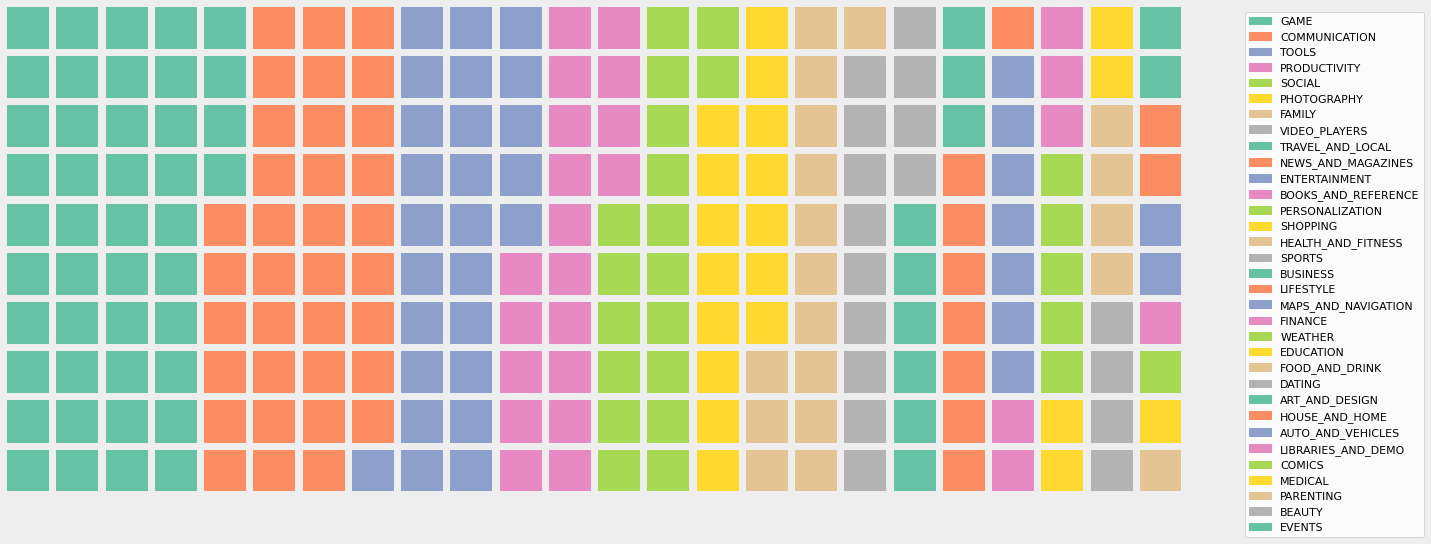

In [4]:
from pywaffle import Waffle
sns.set_context("notebook")

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns = 24,
    figsize = (20, 10),
    values=df1.Installs/1000000000, 
    labels= list(df1.Category),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
    starting_location='NW'
    
)
fig.set_facecolor('#EEEEEE')
#plt.title('Installations Distribution of Categories', size = 20)
plt.show()
 

**Percentage Distribution**

In [5]:
dfp = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()


category = list(dfp.Category)
installs = list(dfp.Installs)

fig= go.Figure(go.Treemap(
    
    labels =  category,
    parents=[""]*len(category),
    values =  installs,
    textinfo = "label+percent entry"
))
fig.update_layout(
    autosize=False,
    width= 800,
    height=800,)

fig.show()

# **Inference: **

** Out of all the categories "GAME" has the most number of Installations. Number of Installations is directly proportional to the popularity of the App , hence Games is the most popular Category **

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

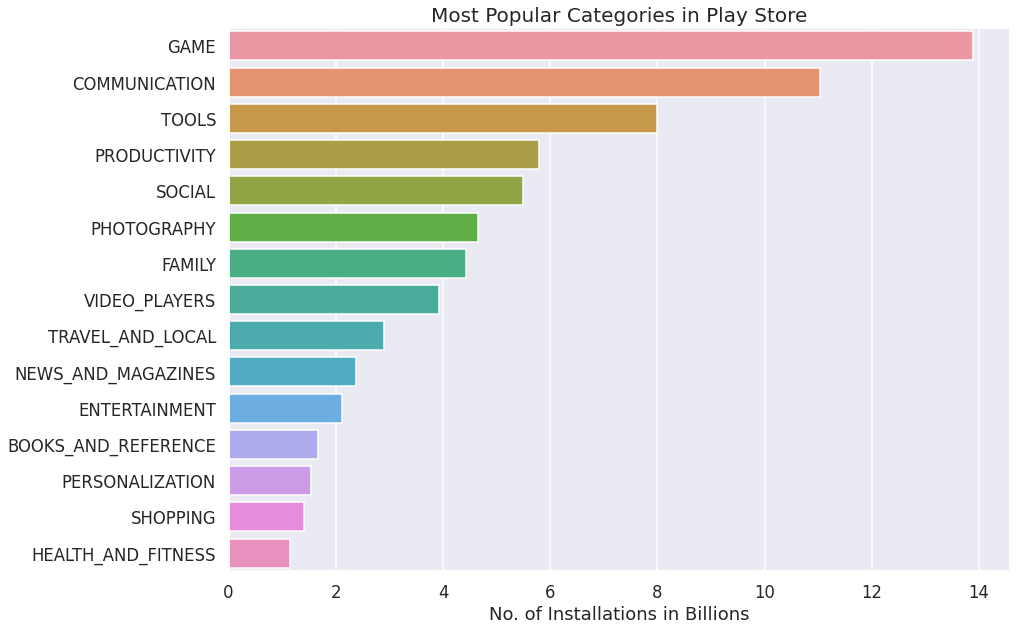

In [6]:
df1.Installs = df1.Installs/1000000000# converting into billions
df2 = df1.head(15)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")


ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)


 **With almost 14  Billion Installations **GAME** is the most popular Category in Google App store**

Text(0.5, 1.0, 'Least Popular Categories in Play Store')

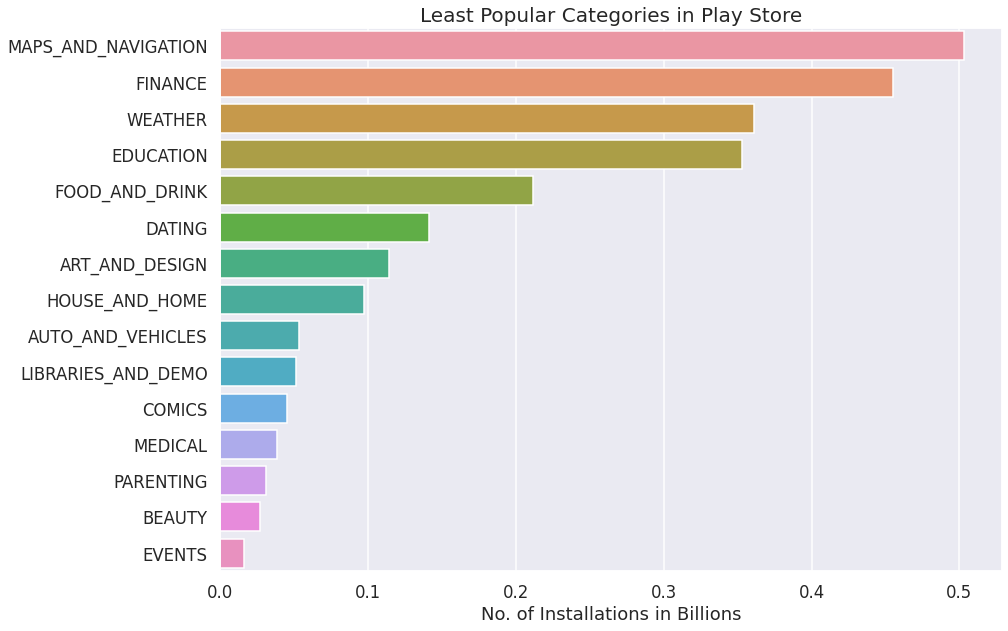

In [7]:
df3 = df1.tail(15)
sns.set_context("talk")

plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df3 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Least Popular Categories in Play Store", size = 20)


In [8]:
dfa = df.groupby(['Category' ,'App'])['Installs'].sum().reset_index()

dfa = dfa.sort_values('Installs', ascending = False)

dftop = dfa[dfa.Installs == 1000000000 ]


dftop.style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

# Apps with largest Number of Installations

**List of Apss which has 1 billion + installations** 

Google ,Google Drive, Google Chrome  Fast  Secure , Google+ ,Google Photos ,Google Play Games ,Google Play Books ,Google News ,Hangouts

Gmail ,Google Street View ,Google Play Movies & TV ,Maps - Navigate & Explore , YouTube  **(Apps owned by Google)**

Facebook ,WhatsApp Messenger , Instagram ,Messenger – Text and Video Chat for Free **(Apps owned by Facebook)**

Skype - free IM & video calls  **(owned by Microsoft)**
       
Subway Surfers  **(owned by SYBO GAMES)**
       


The reason why google app installation are higher is they are preinstalled in all of the androids.

In [9]:
size = df.groupby(['Category','App'])['Size'].sum().sort_values(ascending = False).reset_index()

# #dropping varies with device
size = size[size.Size!='Varies with device']
#size['new'] = size['Size'].str.extract('(\w)', expand=True) 


size[['n', 'k']] = size.Size.str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True) #extracting numbers and data size 
size['k'] = size['k'].map({'M': 1000, 'k': 1}) #renmaing k and m 
size.Size = size.Size.str.replace('+' , '')
size.Size = size.Size.str.replace(',' , '')
size.dropna(inplace = True) 
size.n = size.n.astype('float')
size['truesize'] = size.n * size.k

size = size[['Category','App', 'truesize']]   #truesize is in KB

size = size.sort_values('truesize', ascending = False)

largesize = size[size.truesize == 100000.0]

largesize.style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

In [10]:
largesize.App.unique()

array(['Hungry Shark Evolution',
       'Car Crash III Beam DH Real Damage Simulator 2018', 'Post Bank',
       'Miami crime simulator', 'Stickman Legends: Shadow Wars',
       'Talking Babsy Baby: Baby Games',
       'Mini Golf King - Multiplayer Game', 'Draft Simulator for FUT 18',
       'Gangster Town: Vice District', 'Navi Radiography Pro',
       'The Walking Dead: Our World', 'SimCity BuildIt',
       'Ultimate Tennis', 'Vi Trainer'], dtype=object)

# **List of Apps which has the largest size** (**100 MB**)

Hungry Shark Evolution , Car Crash III Beam DH Real Damage Simulator 2018 ,Miami crime simulator ,Stickman Legends: Shadow Wars

Mini Golf King - Multiplayer Game ,The Walking Dead: Our World    **(Category "GAME')**

Talking Babsy Baby: Baby Games    **(Category Lifestyle)**

Draft Simulator for FUT 18  , Ultimate Tennis     **(Category SPORT)**

Gangster Town: Vice District , SimCity BuildIt  **(Category Family)**

Navi Radiography Pro       **(Category Medical)**
       
Vi Trainer      **(Category Health & Fitness)**


Post Bank  **(Category Finance)**

Text(0.5, 1.0, 'App Size Distribution')

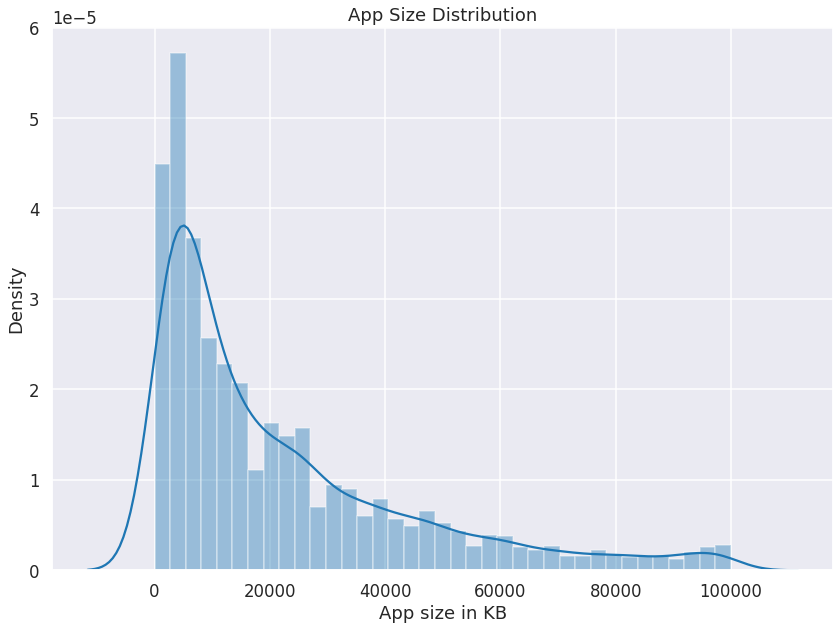

In [11]:
sns.set_context("talk")

plt.figure(figsize = (14,10))

ax = sns.distplot(size['truesize'])
ax.set_xlabel('App size in KB')
ax.set_title('App Size Distribution')


Text(0.5, 1.0, 'App Size Distribution ')

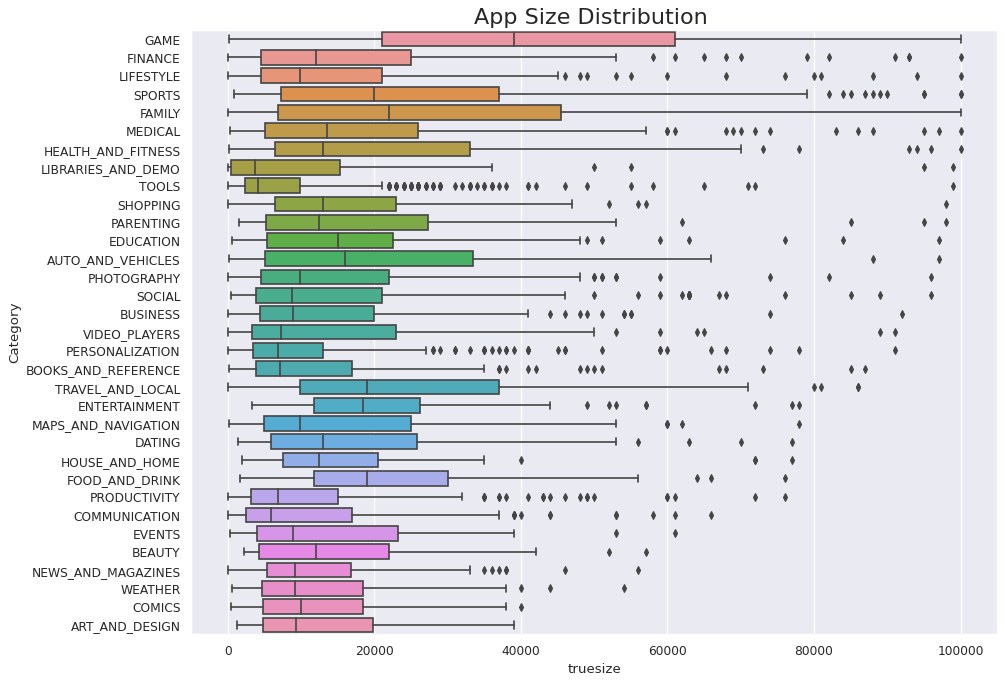

In [12]:
plt.figure(figsize=(13,10), dpi= 80)
sns.set_context("notebook")
ax = sns.boxplot(x='truesize', y='Category', data= size , notch=False)
ax.set_title('App Size Distribution ' , size = 20)

**Top 5 most installed Apps in Each Category**

In [13]:
apps = ['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY','FAMILY', 'VIDEO_PLAYERS' ]

In [14]:
dfa.Installs = dfa.Installs/1000000

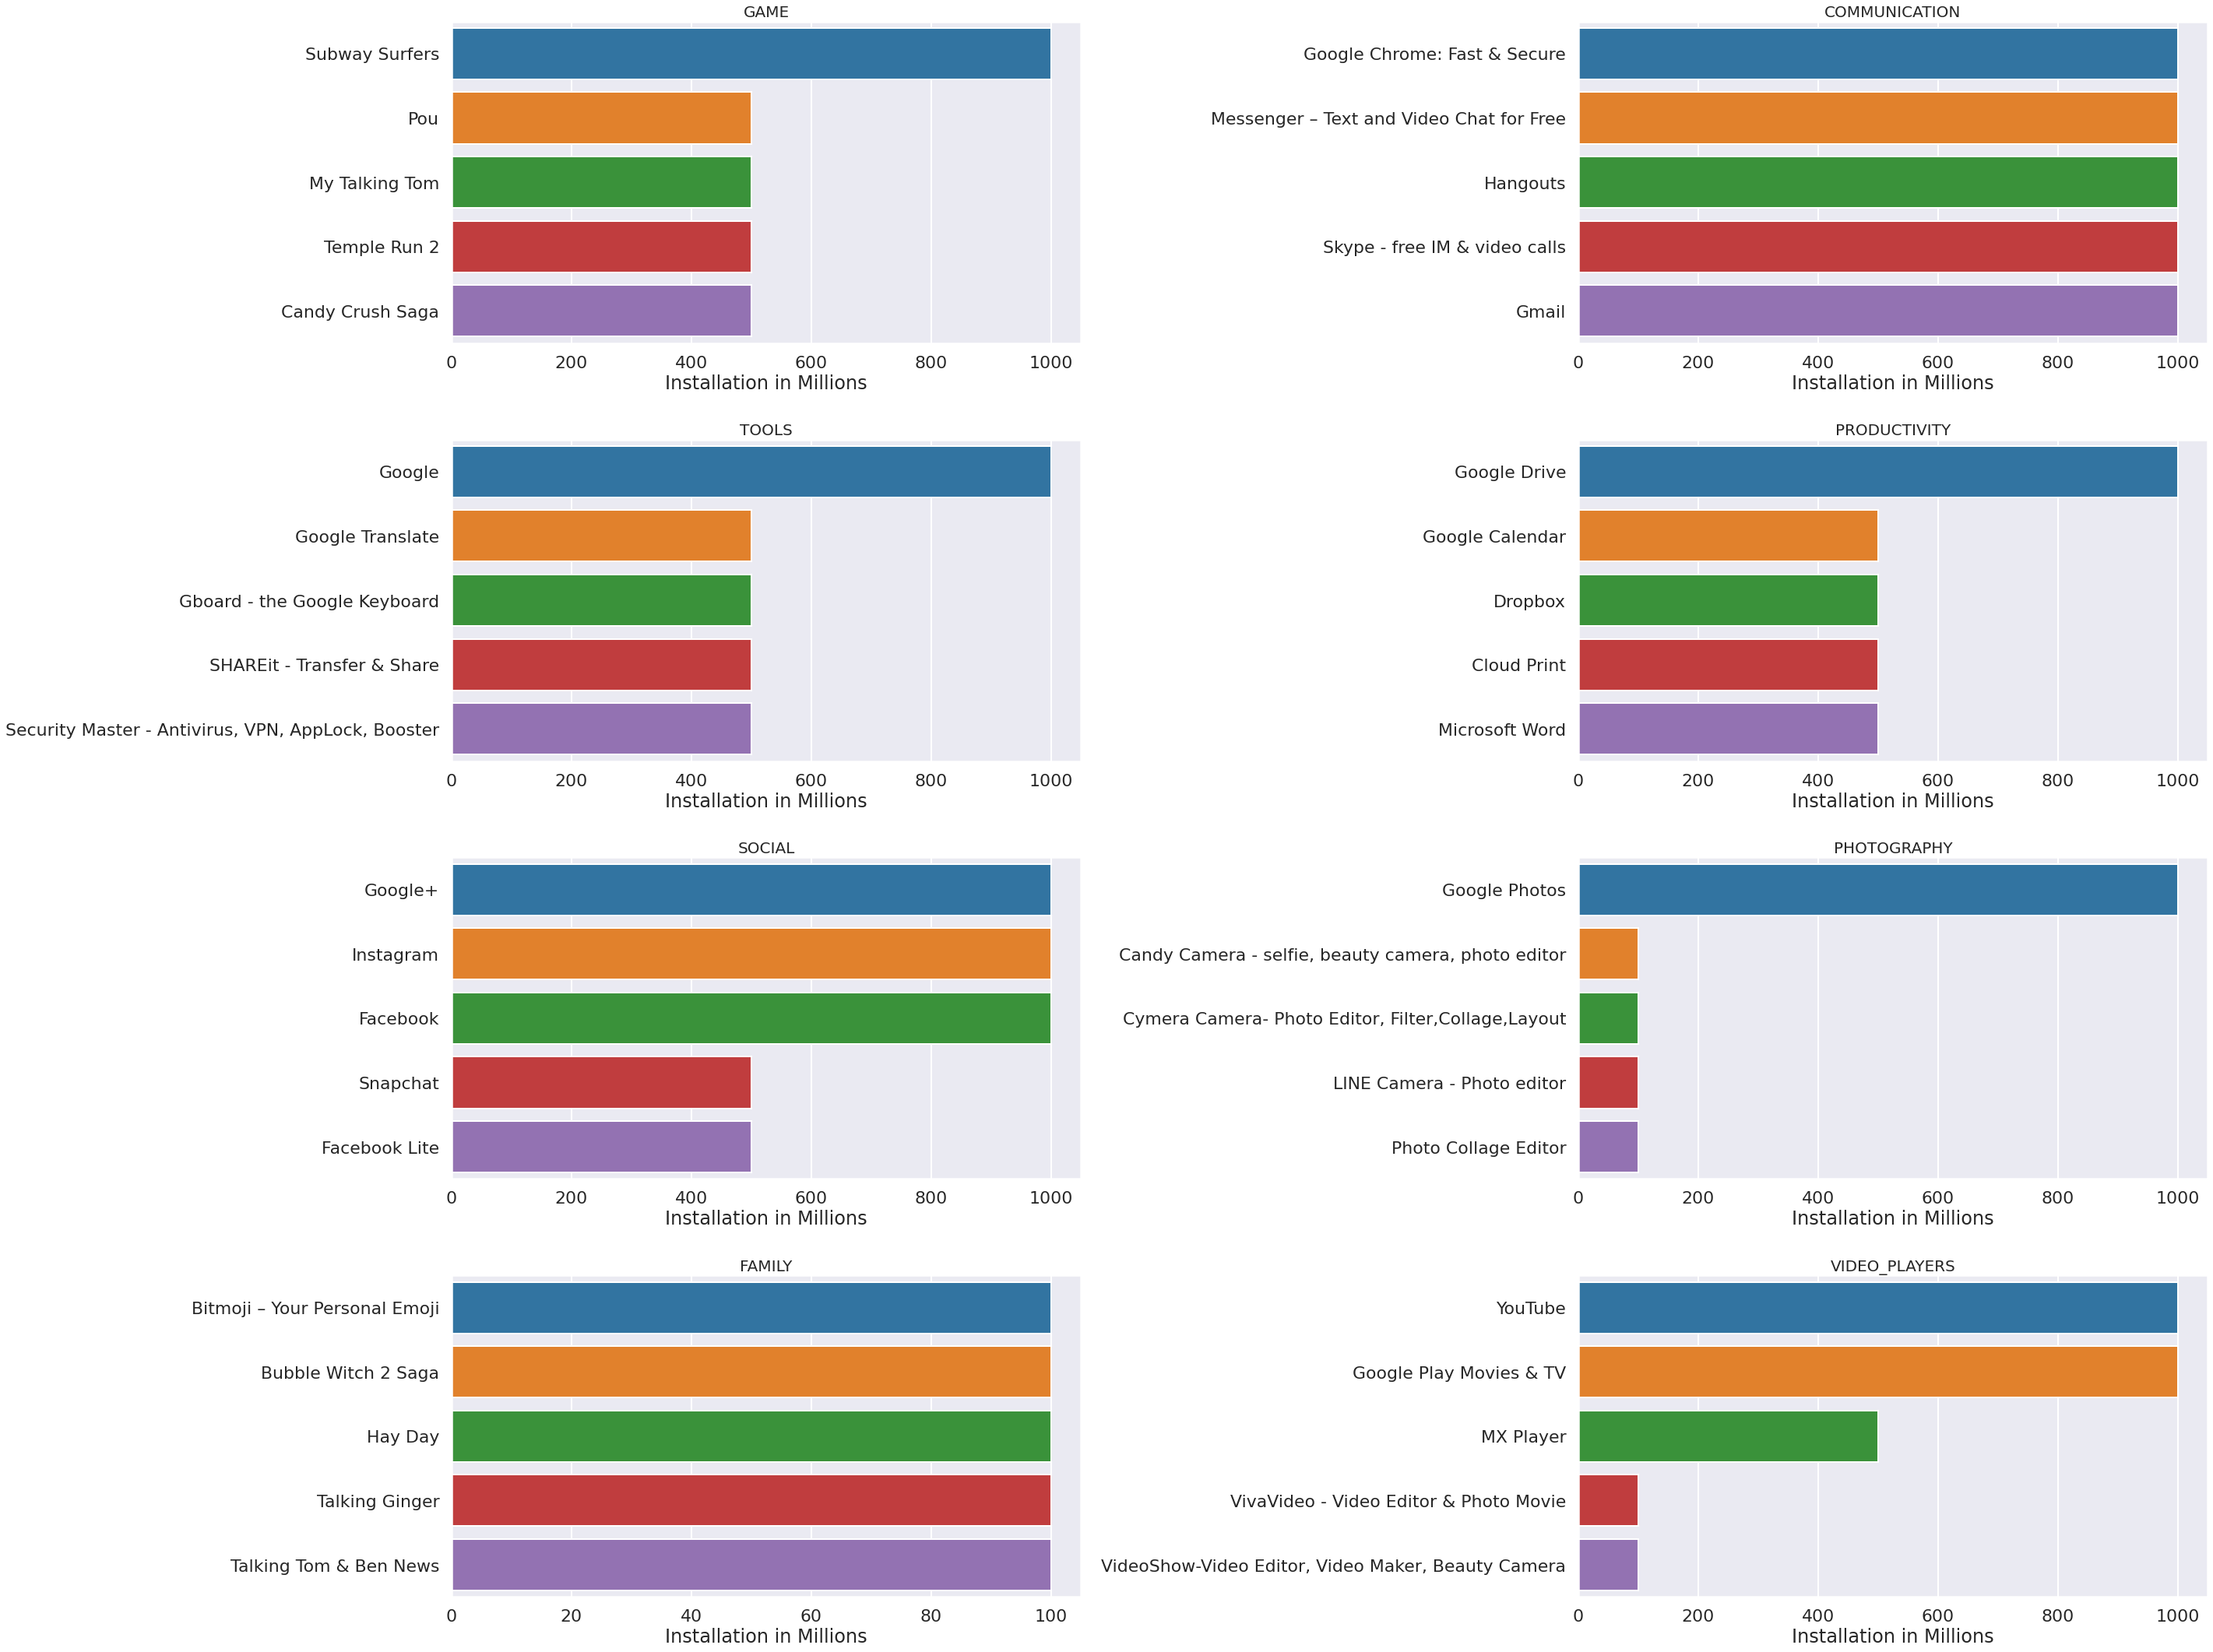

In [15]:
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

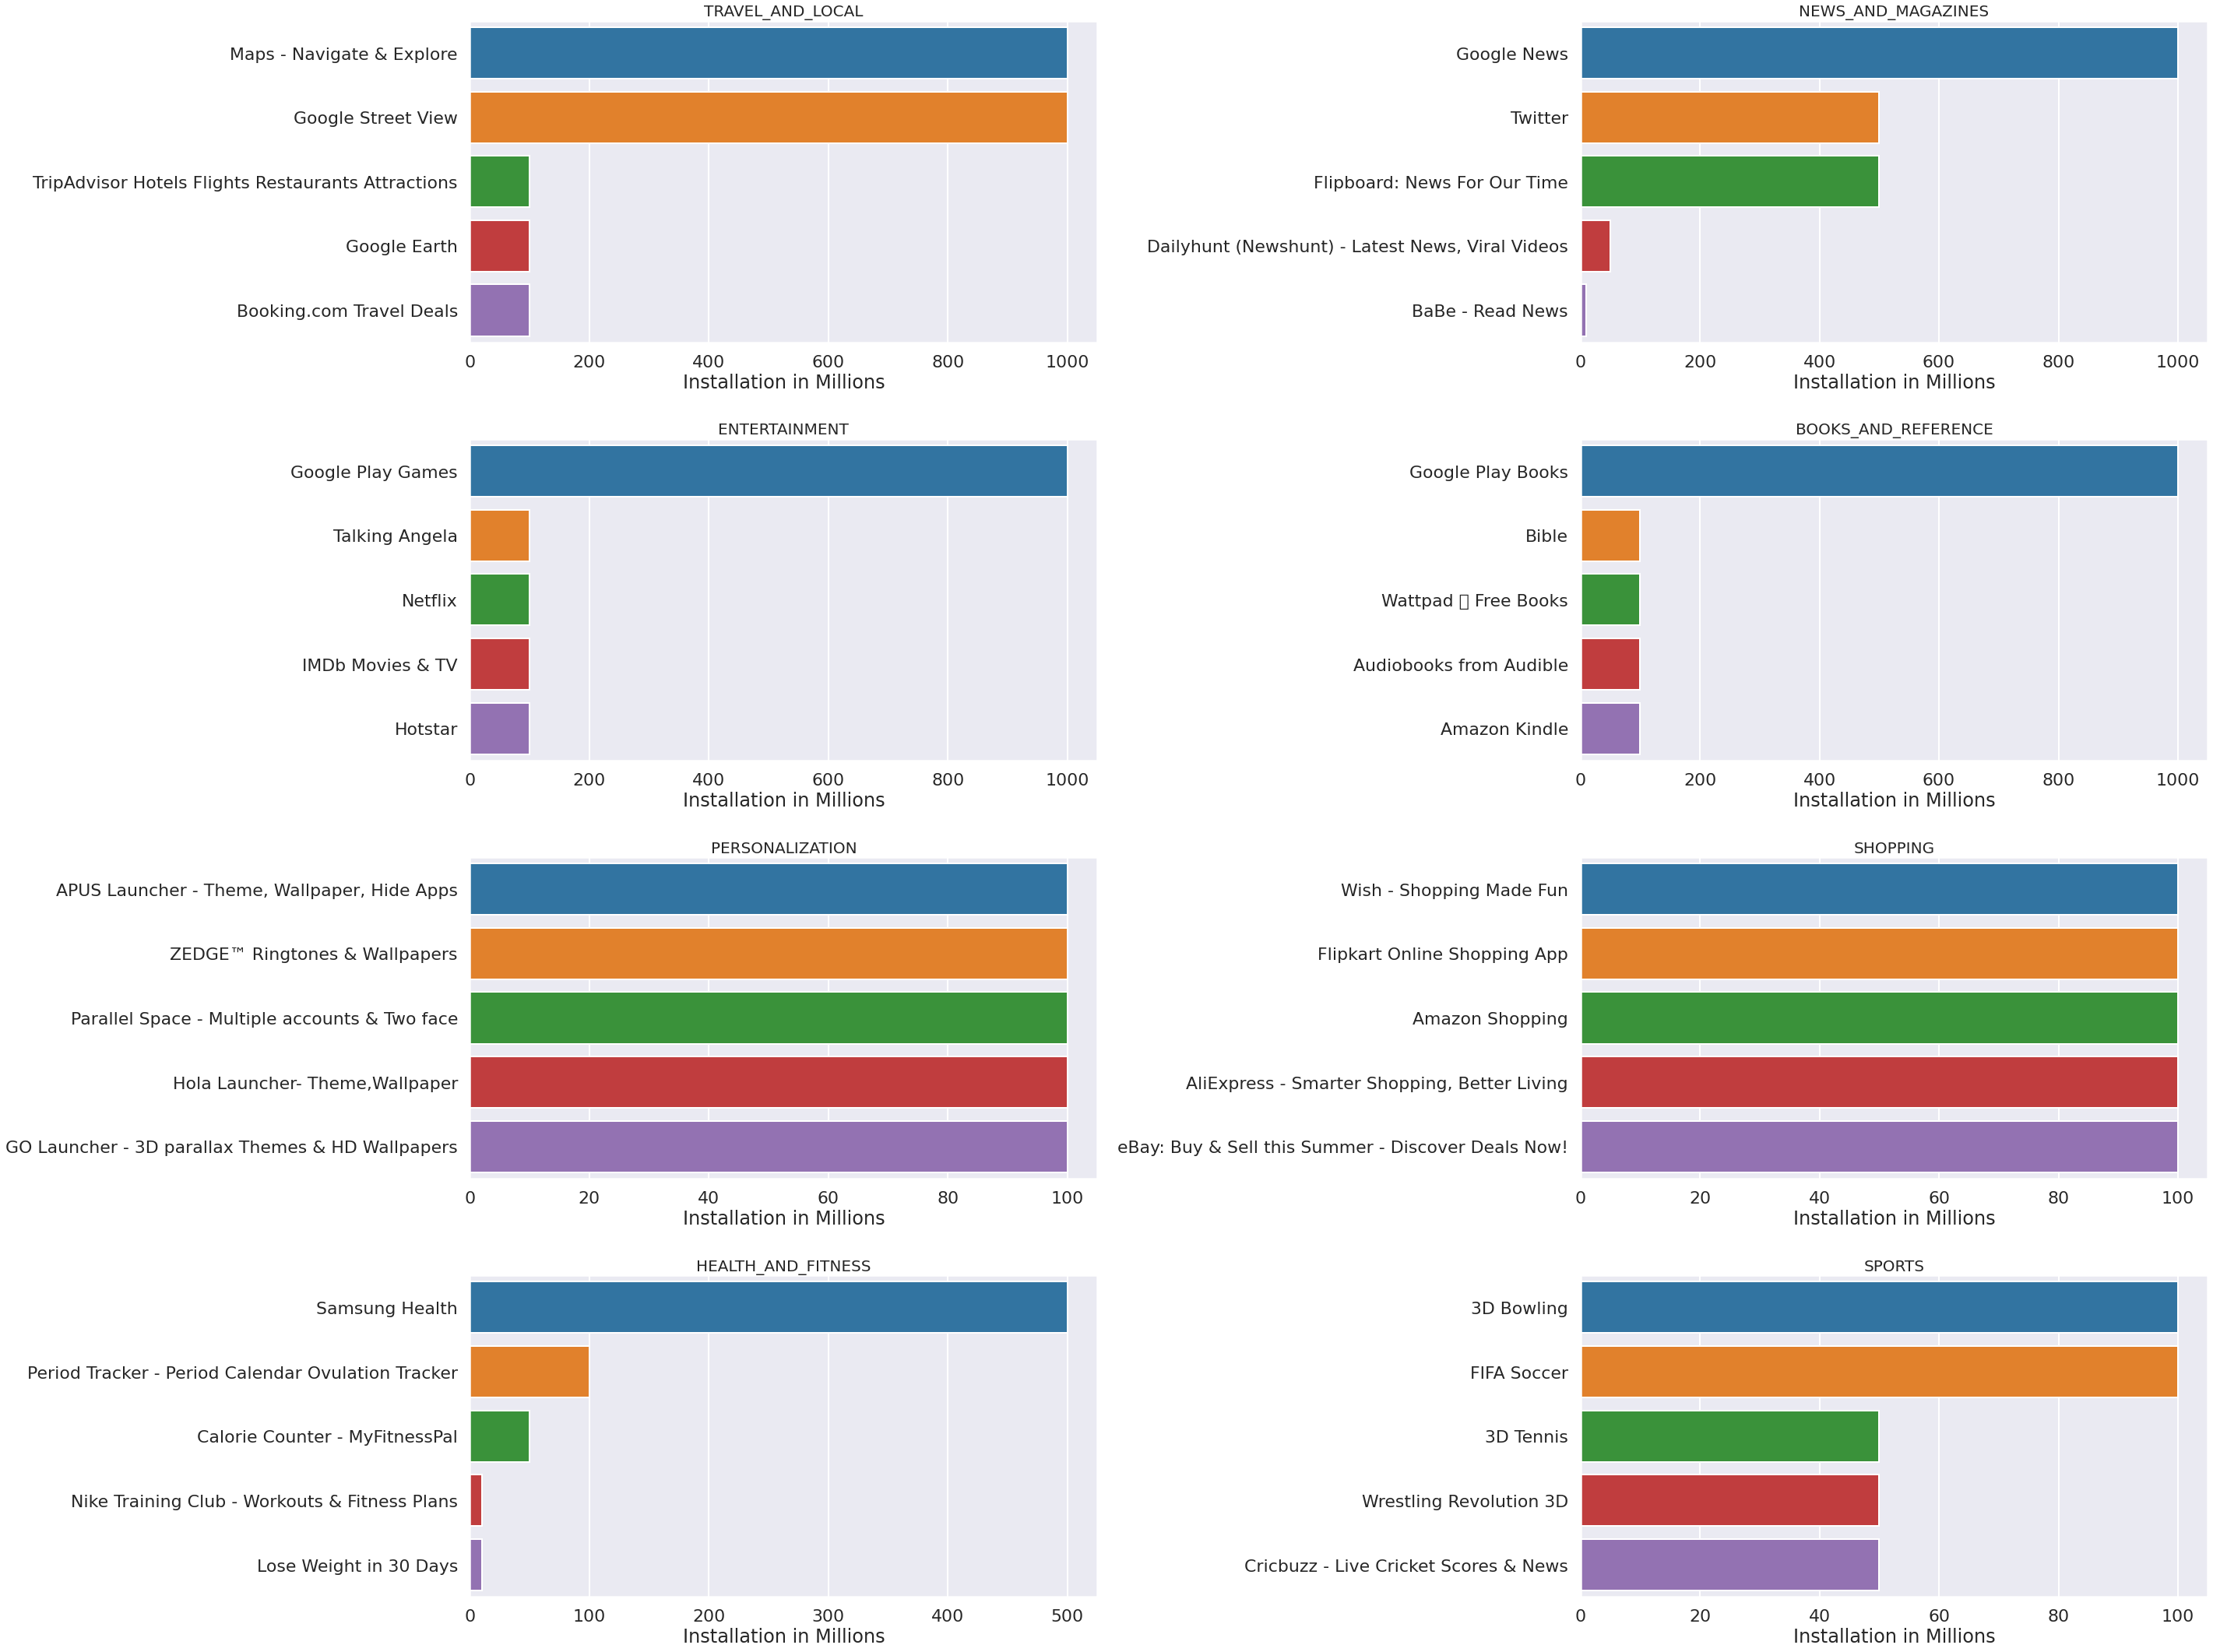

In [16]:

columns = [ 'TRAVEL_AND_LOCAL','NEWS_AND_MAGAZINES','ENTERTAINMENT', 'BOOKS_AND_REFERENCE',
            'PERSONALIZATION', 'SHOPPING', 'HEALTH_AND_FITNESS', 'SPORTS']

sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,column in enumerate(columns):
    df2 = dfa[dfa.Category == column]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(column,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

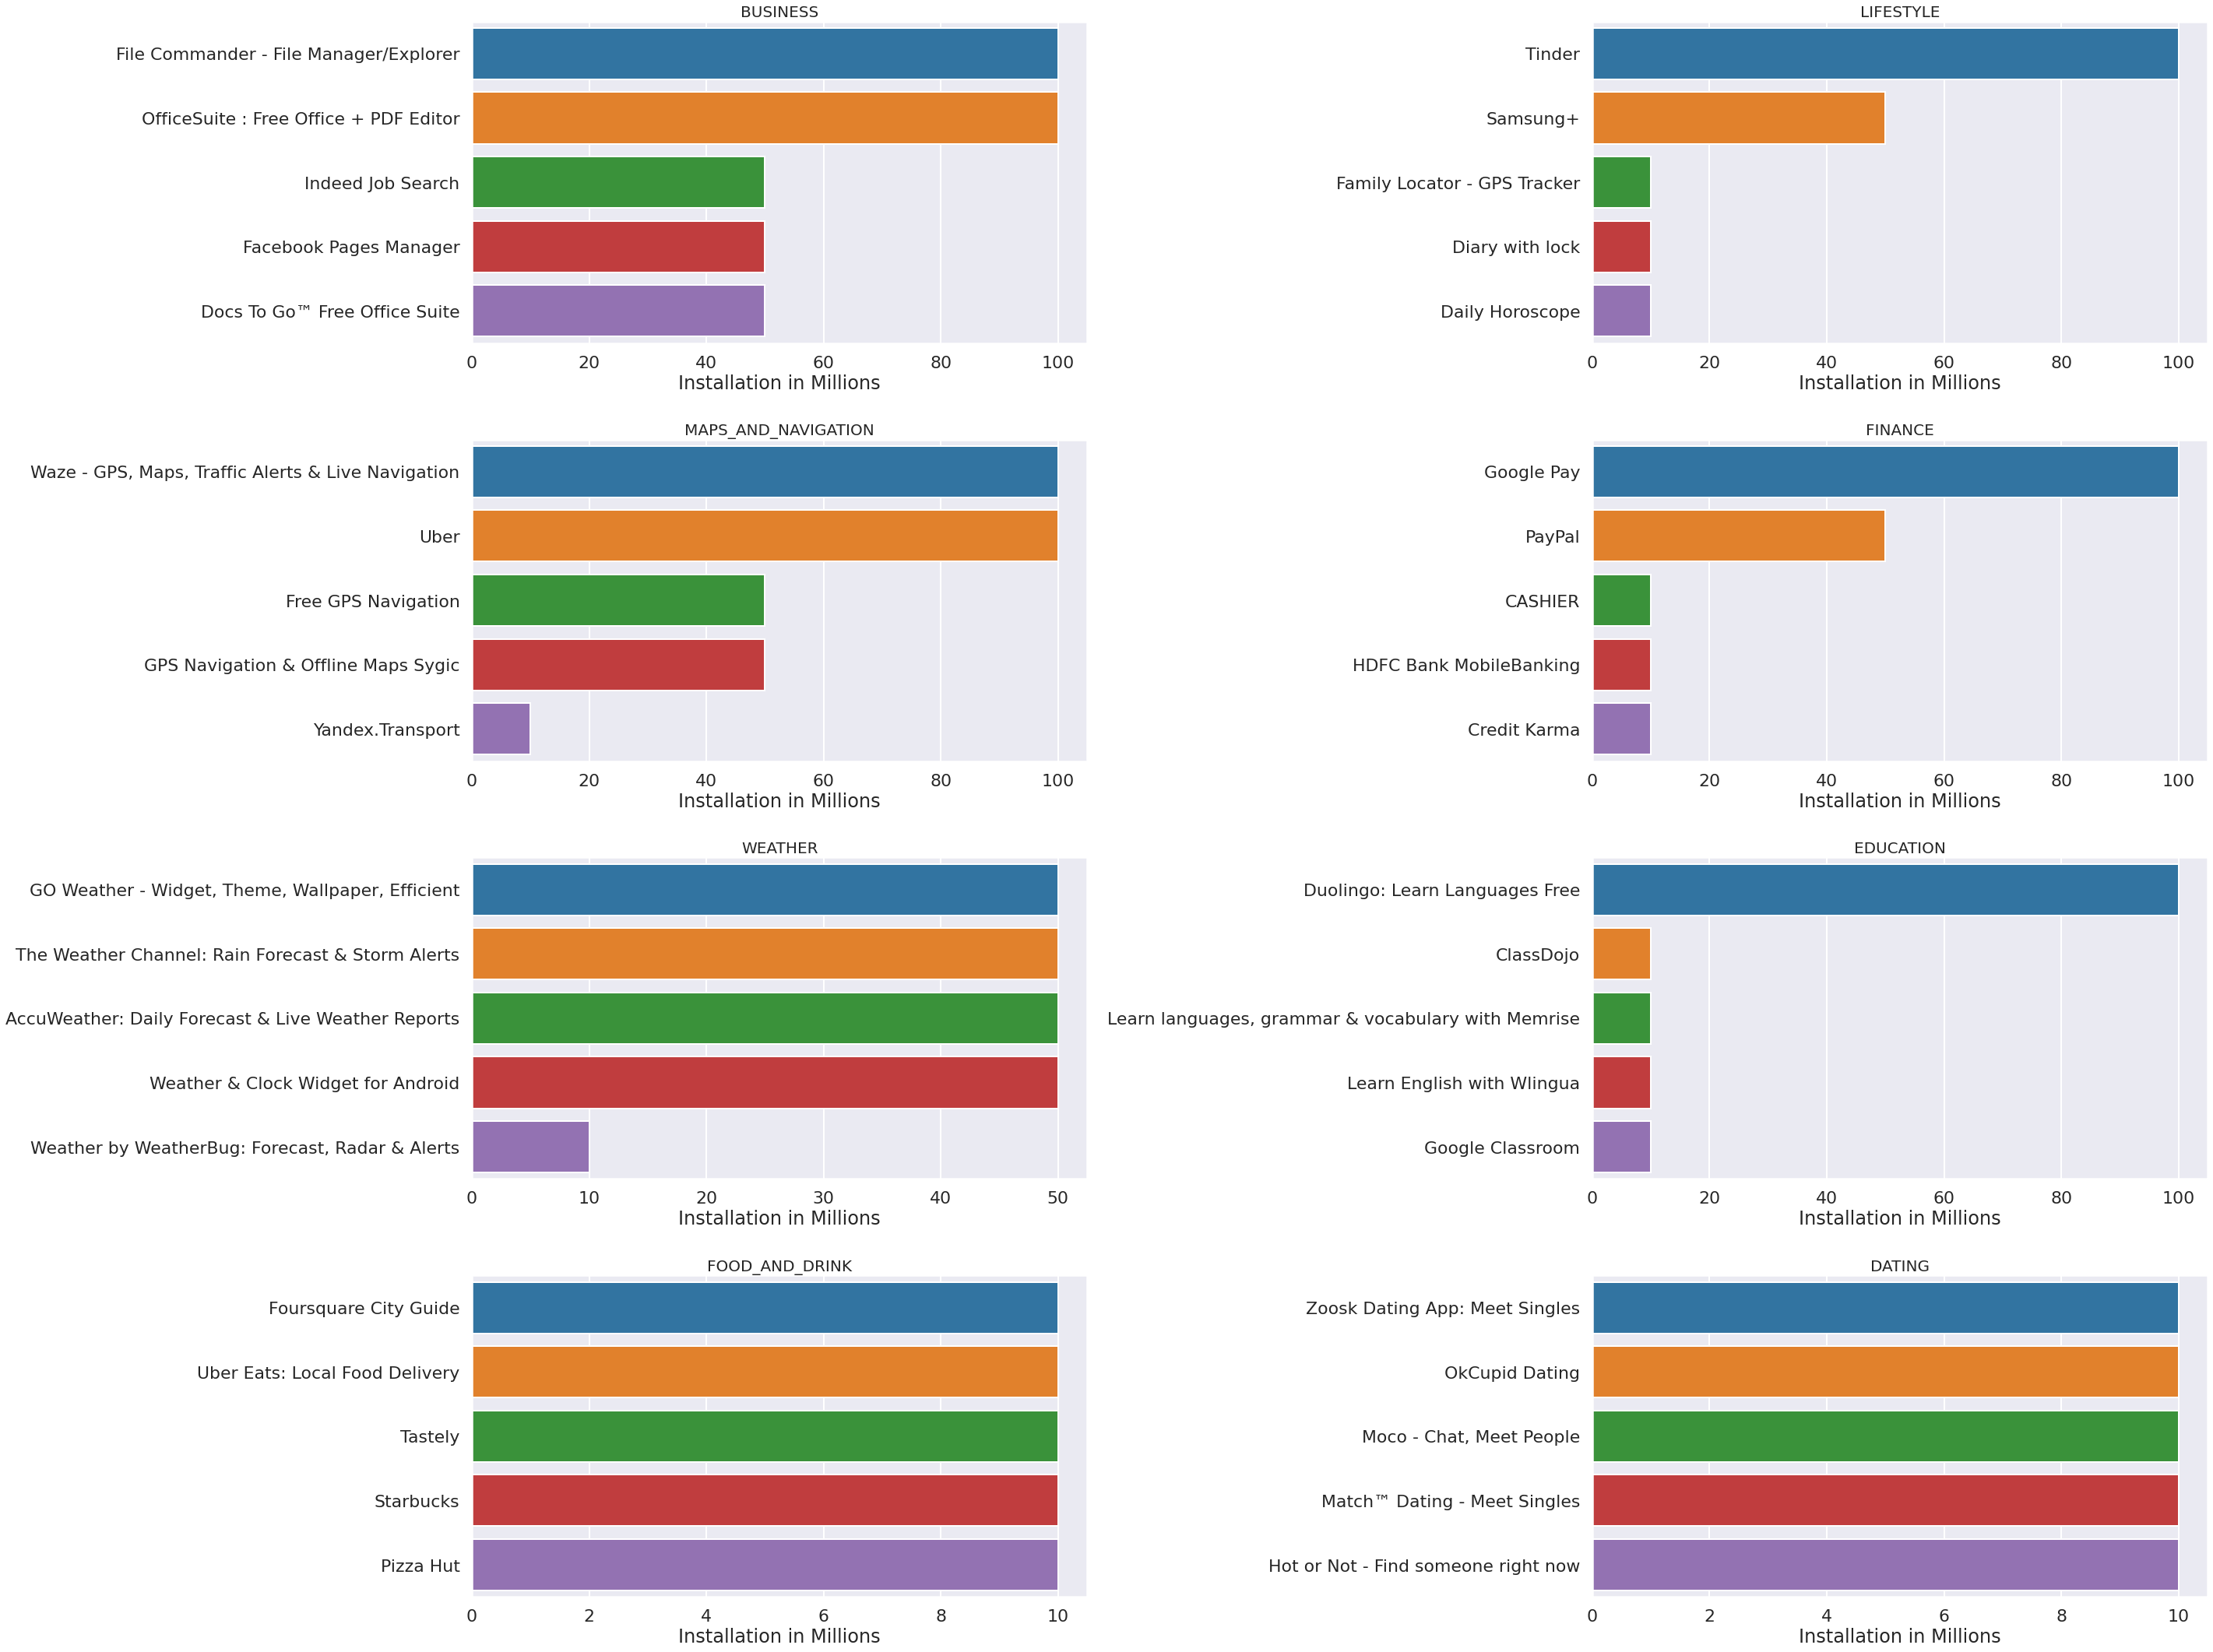

In [17]:

mapps = ['BUSINESS', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'FINANCE','WEATHER', 'EDUCATION', 'FOOD_AND_DRINK', 'DATING']

sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,mapp in enumerate(mapps):
    df2 = dfa[dfa.Category == mapp]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(mapp,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

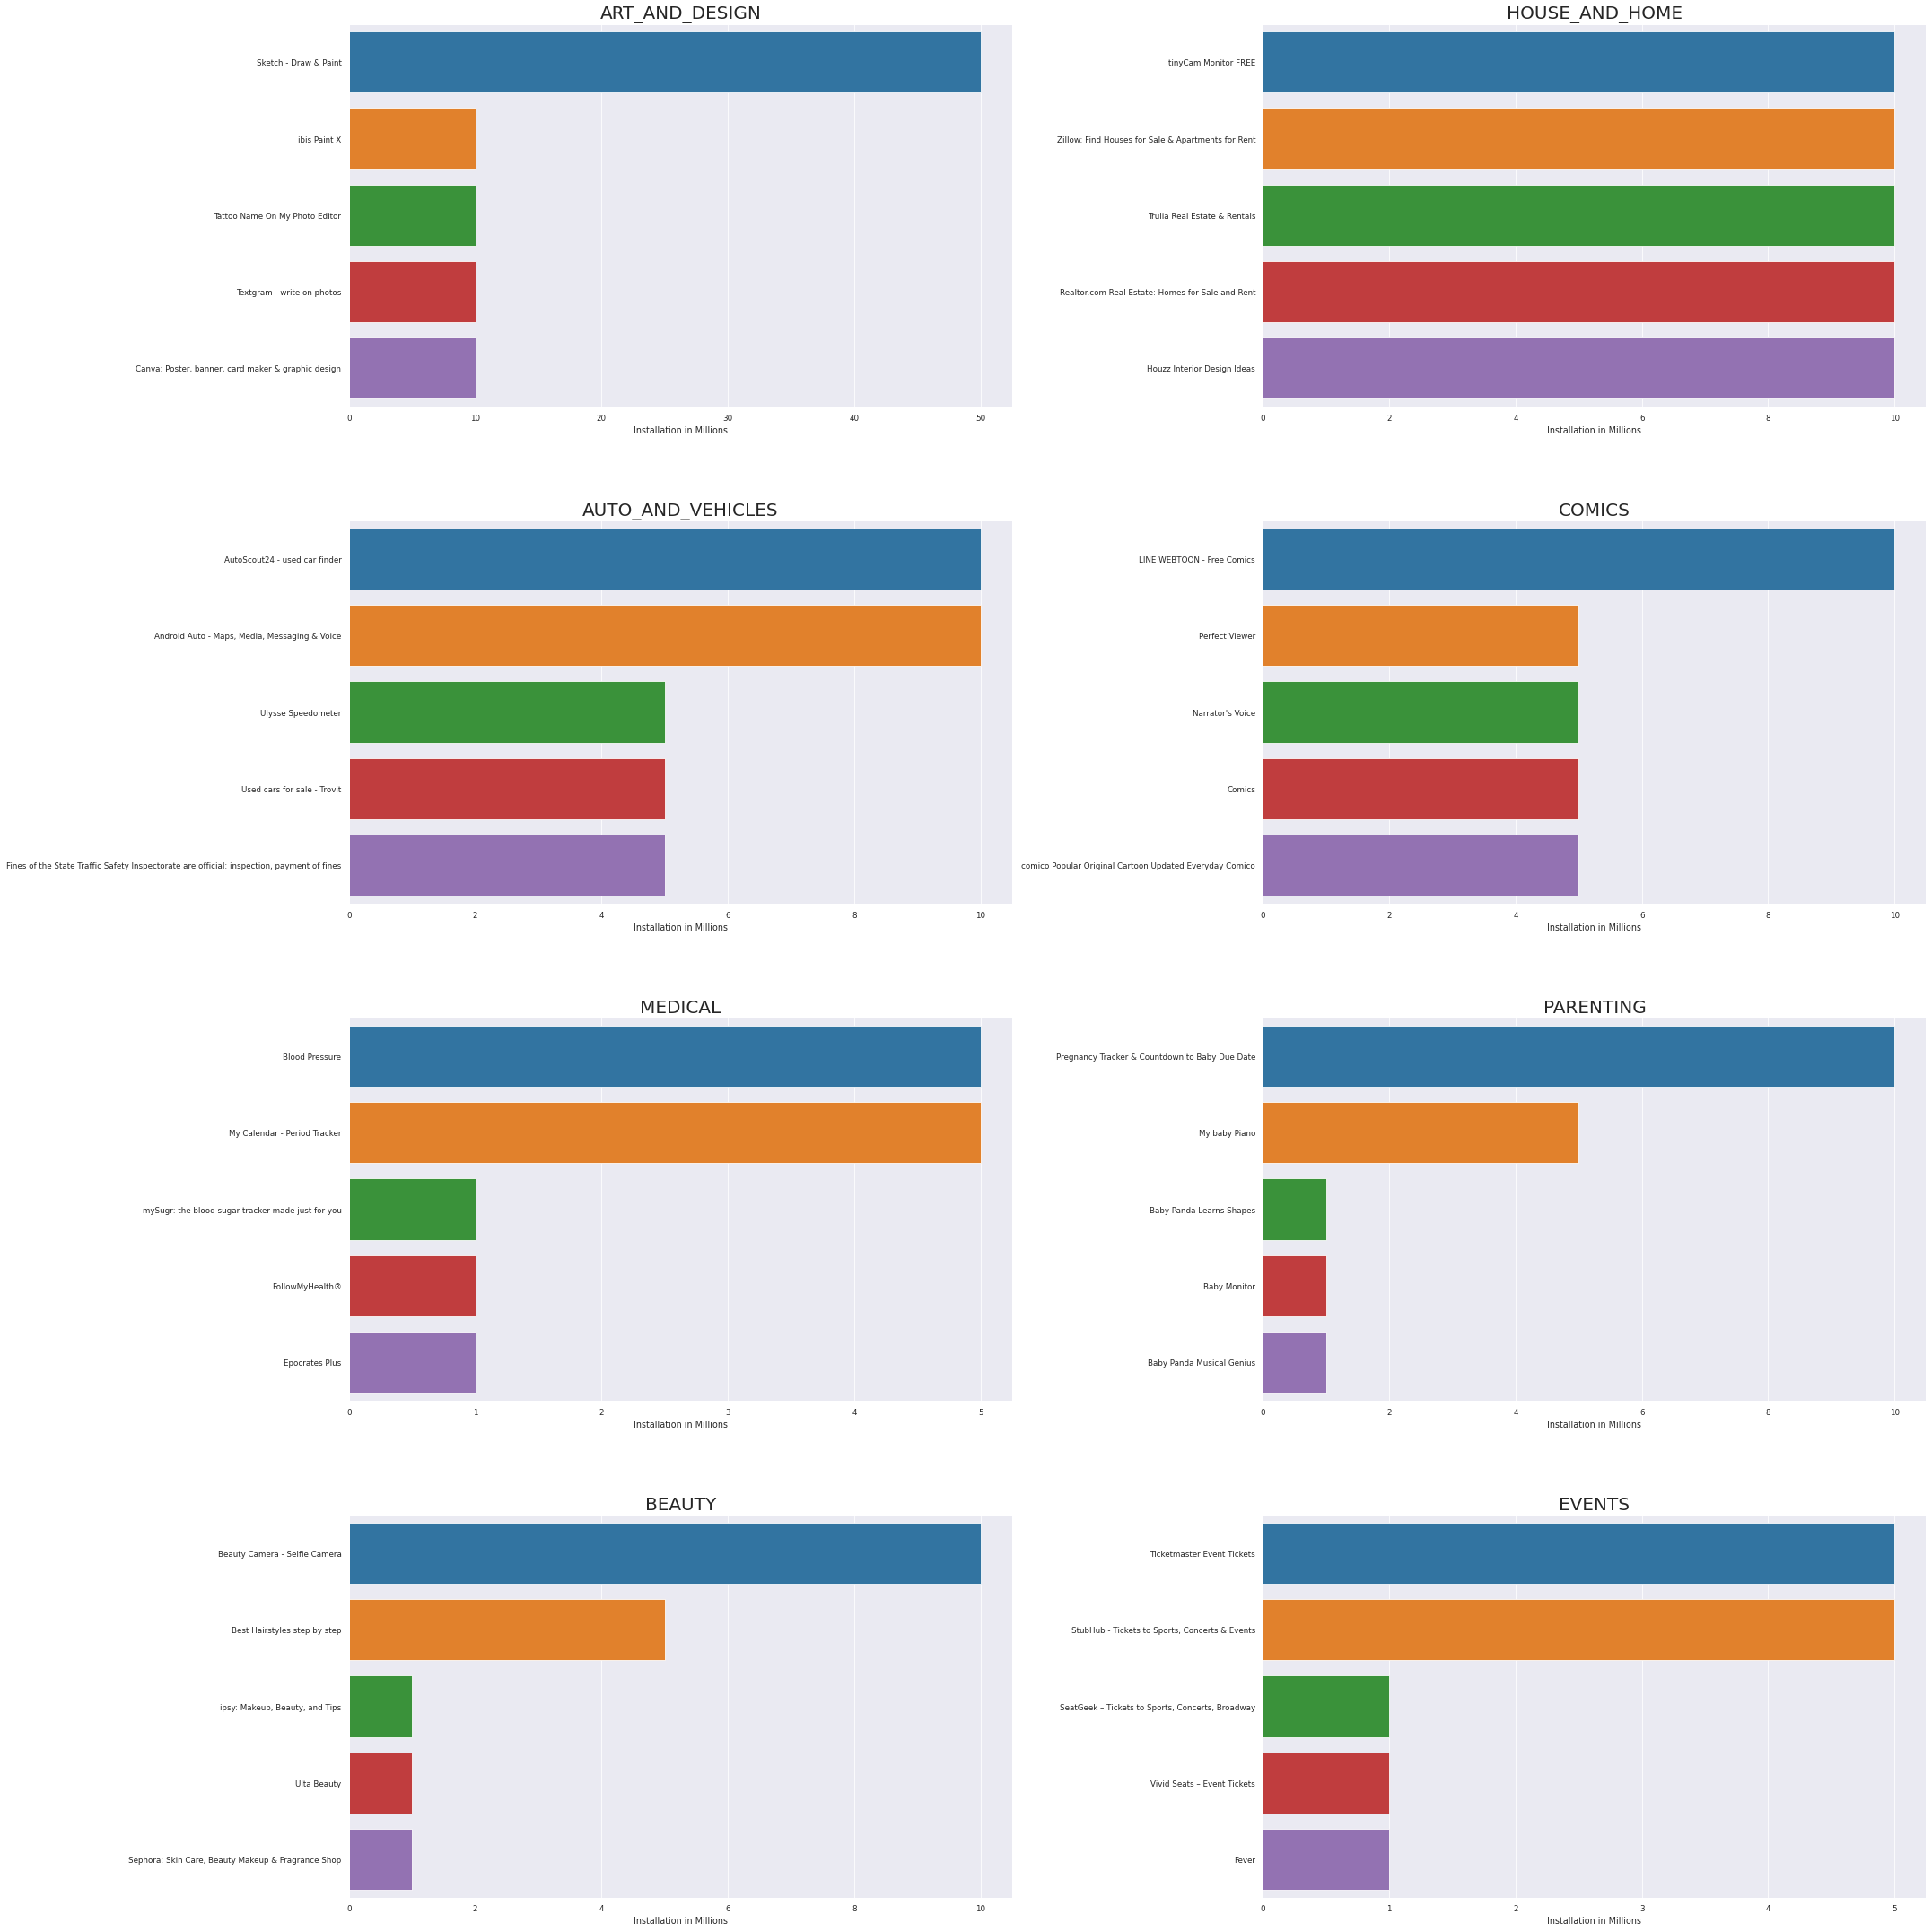

In [18]:

sapps = [ 'ART_AND_DESIGN', 'HOUSE_AND_HOME', 'AUTO_AND_VEHICLES',
        'COMICS', 'MEDICAL', 'PARENTING', 'BEAUTY',
       'EVENTS']

sns.set_context("paper")
sns.set_style("darkgrid")

plt.figure(figsize=(30,30))

for i,sapp in enumerate(sapps):
    df2 = dfa[dfa.Category == sapp]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    ax =sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(sapp,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [19]:
rating = df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating = rating[rating.Rating == 5.0]

toprating

Category  Installs                                      App  Rating
0    ART_AND_DESIGN       100  Spring flowers theme couleurs d t space     5.0
1            FAMILY      1000                          Fr. Daoud Lamei     5.0
2           FINANCE       100                           DN Calculators     5.0
3           FINANCE       100                                       CF     5.0
4           FINANCE       100                                   BI APP     5.0
..              ...       ...                                      ...     ...
266        BUSINESS       100                                   EF App     5.0
267        BUSINESS      1000                       CK Employee Portal     5.0
268        BUSINESS       100                         CP Installer App     5.0
269        BUSINESS       100                                 ES Solar     5.0
270        BUSINESS        50                                 EF Forms     5.0

[271 rows x 4 columns]

**There are 271 Apps Which have 5.0 rating**

Text(0.5, 1.0, 'Distribution of App Ratings')

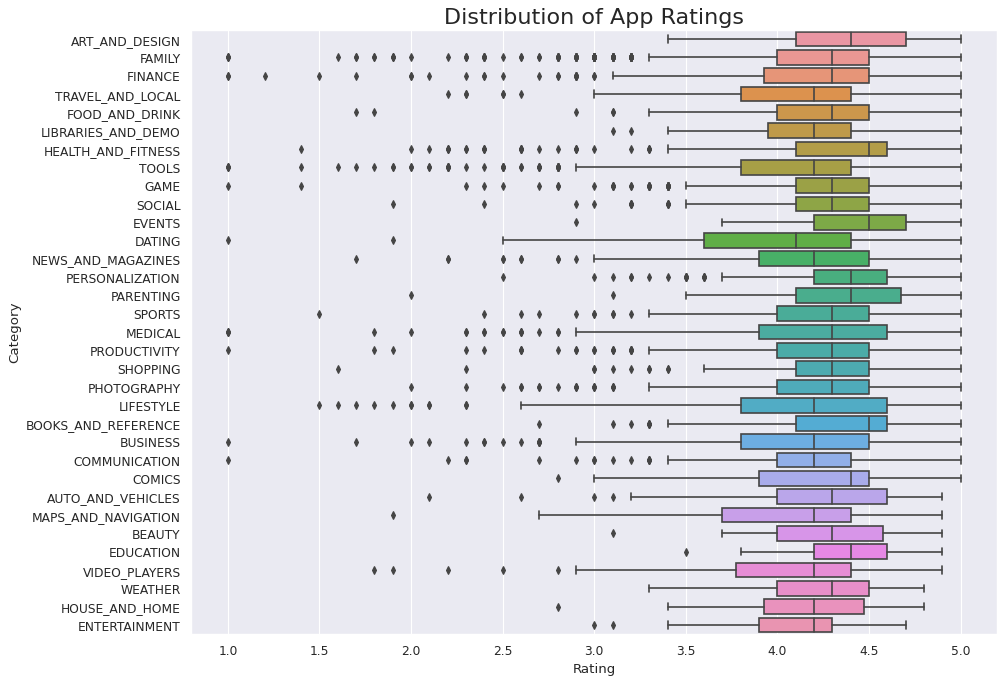

In [20]:
plt.figure(figsize=(13,10), dpi= 80)
sns.set_context("notebook")
ax = sns.boxplot(x='Rating', y='Category', data= rating , notch=False)

ax.set_title('Distribution of App Ratings' , size = 20)


# **Conclusion**

1  'GAME ' is the Most Popular Category with almost 14 billion Installations.

2  There are 20 Apps which have installed for than 1 billion times. out of these  14 are owned by google ittself and 4 are owned by Facebook.

3  There are  14 Apps with largest size of 100 mb , out of those 6 are from 'GAME' Category